Импортируем необходимые библиотеки

In [1]:
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install statsmodels


[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt

Импорт данных

In [3]:
# с помощью системной библиотеки OS определяем путь до файла с данными ЭКГ
dirname = os.path.abspath(os.curdir)

# загружаем данные в переменную, содержащую объект библиотеки Pandas - Dataframe
rawdata = pd.read_csv(path.join(os.sep, dirname, 'Total daily precipitation Fisher River near Dallas Jan 01 1988 to Dec .csv'))

# устанавливаем индекс времени для временного ряда и сортируем по нему выборку
data = rawdata.set_index('Unnamed: 0').sort_index()

data = data.rename(columns={'x': 'Count'})
rawdata = rawdata.rename(columns={'x': 'Count'})

In [4]:
data.head()

,Count
Unnamed: 0,
1,0.0
2,3.0
3,1.0
4,0.0
5,0.0


In [5]:
data.describe()

,Count
count,1461.000000
mean,1.617796
std,4.520368
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,47.000000


Графическое представление и описание поведения временного ряда


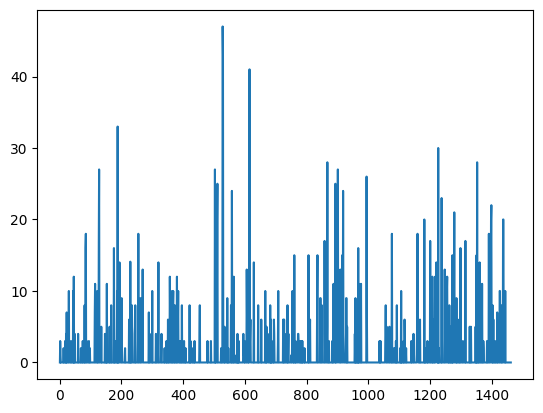

In [6]:
plt.plot(data["Count"])

In [7]:
from statsmodels.tsa.stattools import adfuller
def TestDikiFull(ts):
    alpha = 0.05
    print(f'Тест Дики-Фуллера:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    if dfoutput["p-value"] < alpha:
        print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
    else:
        print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

In [8]:
data['MA_window_3'] = data['Count'].rolling(window=3).mean()
data

,Count,MA_window_3
Unnamed: 0,,
1,0.0,NaN
2,3.0,NaN
3,1.0,1.333333
4,0.0,1.333333
5,0.0,0.333333
...,...,...
1457,0.0,0.000000
1458,0.0,0.000000
1459,0.0,0.000000


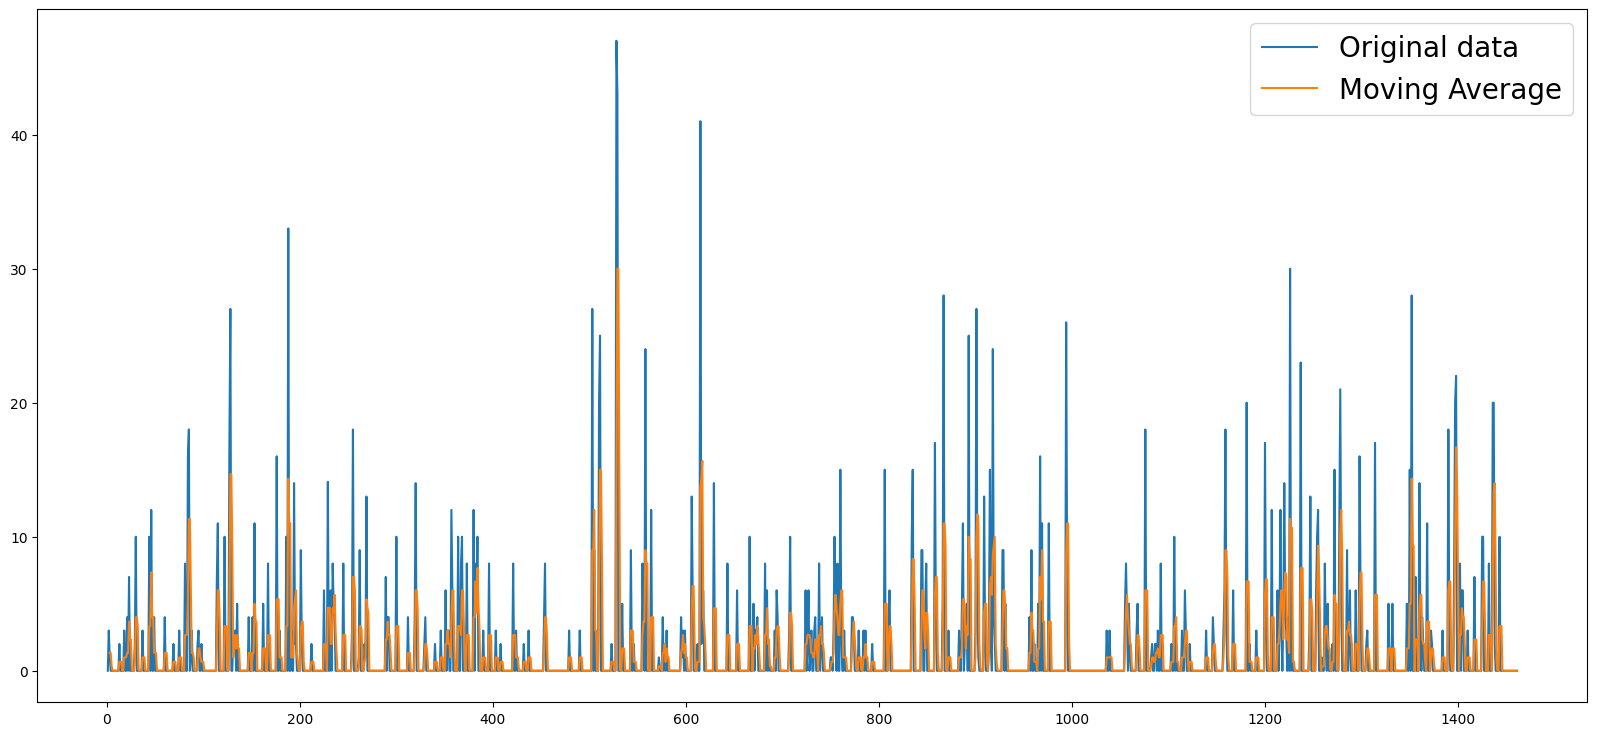

In [9]:
fig = plt.figure(figsize=(20, 9))
plt.plot(data['Count'], label='Original data')
plt.plot(data['MA_window_3'], label='Moving Average')
plt.legend(fontsize="20")
plt.show()

In [10]:
def plot_ts(ts, plot_ma=True, plot_intervals=True, window=100,
            figsize=(15,5)):
    rolling_mean = ts.rolling(window=window).mean()
    rolling_std = ts.rolling(window=window).std()
    plt.figure(figsize=figsize)
    plt.title(ts.name)
    plt.plot(ts[window:], label='Реальные значения', color="black")
    if plot_ma:
        plt.plot(rolling_mean, 'g', label='MA'+str(window),
                 color="red")
    if plot_intervals:
        lower_bound = rolling_mean - (1.96 * rolling_std)
        upper_bound = rolling_mean + (1.96 * rolling_std)
    plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                     color='lightskyblue', alpha=0.4)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

C:\Users\Oleg\AppData\Local\Temp\ipykernel_8484\2820275210.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


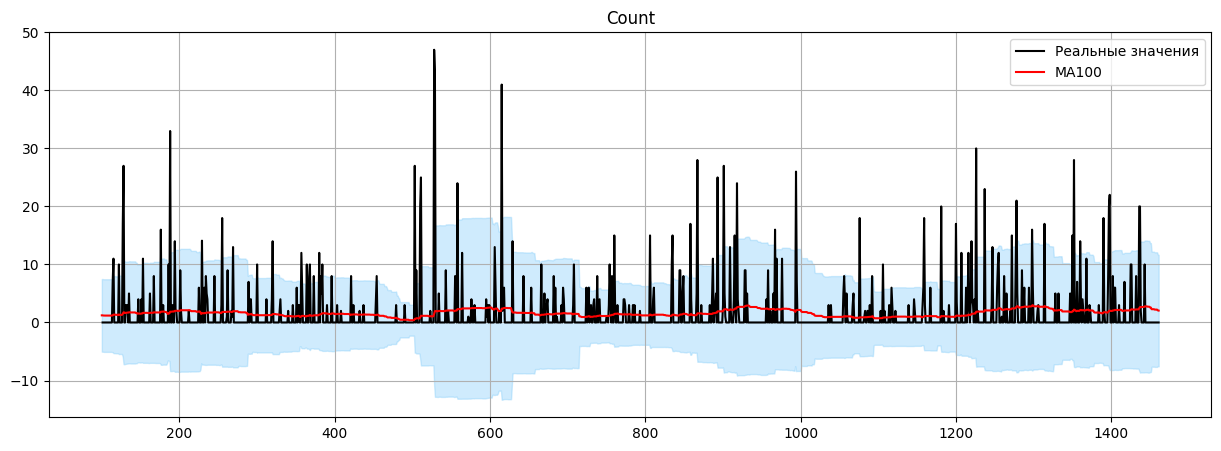

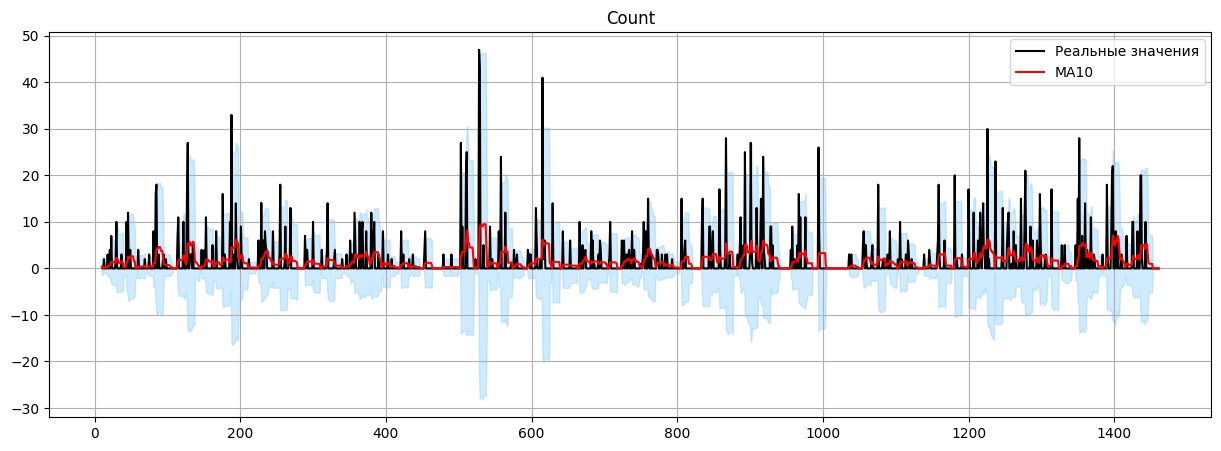

In [11]:
plot_ts(data["Count"], window=100)
plot_ts(data["Count"], window=10)

In [12]:
from statsmodels.tsa.arima.model import ARIMA

In [13]:
arma_model = ARIMA(data['Count'], order=(5,0,3))
arma_model_fit = arma_model.fit()
print(arma_model_fit.summary())

c:\Users\Oleg\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Oleg\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Oleg\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                 1461
Model:                 ARIMA(5, 0, 3)   Log Likelihood               -4255.850
Date:                Sat, 30 Dec 2023   AIC                           8531.701
Time:                        05:13:08   BIC                           8584.570
Sample:                             0   HQIC                          8551.422
                               - 1461                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6133      0.240      6.714      0.000       1.142       2.084
ar.L1         -0.0244      0.059     -0.416      0.677      -0.140       0.091
ar.L2         -0.1467      0.055     -2.666      0.0

c:\Users\Oleg\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
X = data['Count'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
arma_predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    arma_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [15]:
print(len(train))
print(len(test))
print(len(arma_predictions))

964
497
497


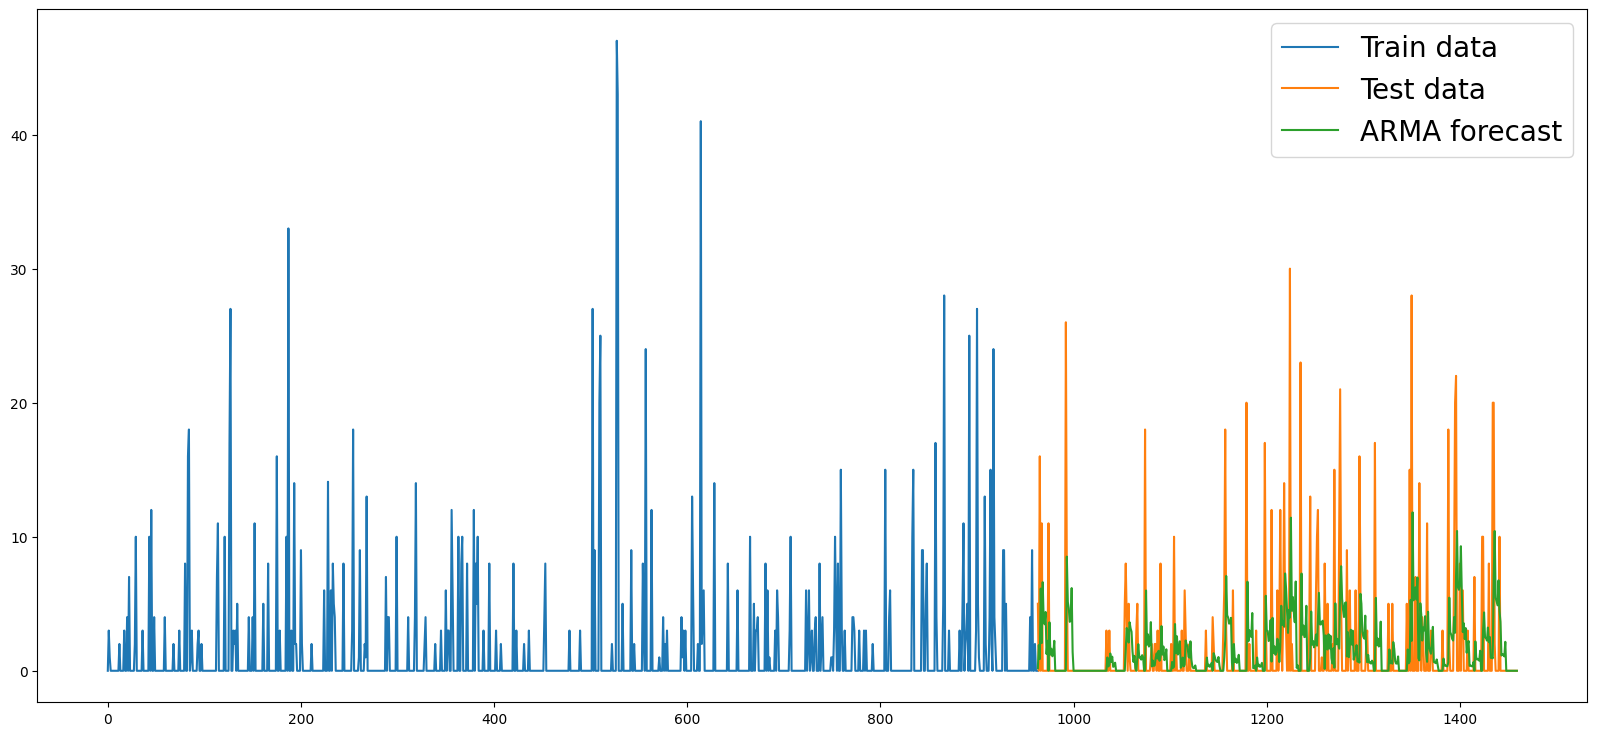

In [16]:
fig = plt.figure(figsize=(20, 9))
dur = len(arma_predictions)

plt.plot([i for i in range(0, size)], train, label='Train data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], test[:dur], label='Test data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], arma_predictions, label='ARMA forecast')
plt.legend(fontsize="20")
plt.show()

In [17]:
arima_model = ARIMA(data['Count'], order=(10,2,10))
arima_model_fit = arima_model.fit()

c:\Users\Oleg\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Oleg\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Oleg\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Oleg\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Oleg\AppData\Local\Program

In [18]:
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                 1461
Model:               ARIMA(10, 2, 10)   Log Likelihood               -4261.015
Date:                Sat, 30 Dec 2023   AIC                           8564.029
Time:                        05:14:33   BIC                           8675.025
Sample:                             0   HQIC                          8605.437
                               - 1461                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -3.8974      0.348    -11.203      0.000      -4.579      -3.216
ar.L2         -8.1878      1.058     -7.736      0.000     -10.262      -6.113
ar.L3        -12.0363      1.958     -6.148      0.0

<Axes: xlabel='Unnamed: 0'>

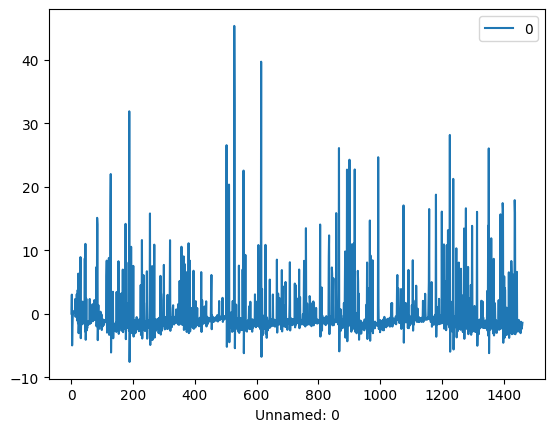

In [19]:
arima_residuals = pd.DataFrame(arima_model_fit.resid)
arima_residuals.plot()

In [20]:
# forecast предсказывает только следующее значение
output = arima_model_fit.forecast()

c:\Users\Oleg\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Oleg\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [21]:
X = data['Count'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
arima_predictions = list()
# walk-forward validation
for t in range(len(test)):
    arima_model = ARIMA(history, order=(10,2,5))
    arima_model_fit = arima_model.fit()
    output = arima_model_fit.forecast()
    yhat = output[0]
    arima_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

c:\Users\Oleg\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Oleg\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Oleg\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Oleg\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

In [ ]:
fig = plt.figure(figsize=(20, 9))
plt.plot([i for i in range(0, size)], train, label='Train data')
plt.plot([i for i in range(size - 1, len(X) - 1)], test, label='Test data')
plt.plot([i for i in range(size - 1, len(X) - 1)], arima_predictions, label='ARIMA forecast')
plt.legend(fontsize="20")
plt.show()

NameError: name 'plt' is not defined

In [ ]:
fig = plt.figure(figsize=(20, 9))

delta = []

for i in range(len(arima_predictions)):
    delta.append(arma_predictions[i] - arima_predictions[i])

plt.plot(delta, label='ARIMA(10,2,5) -  ARMA(5,0,3) delta forecast', linewidth=5)
plt.legend(fontsize="20")
plt.show()

NameError: name 'plt' is not defined

<Axes: xlabel='Unnamed: 0'>

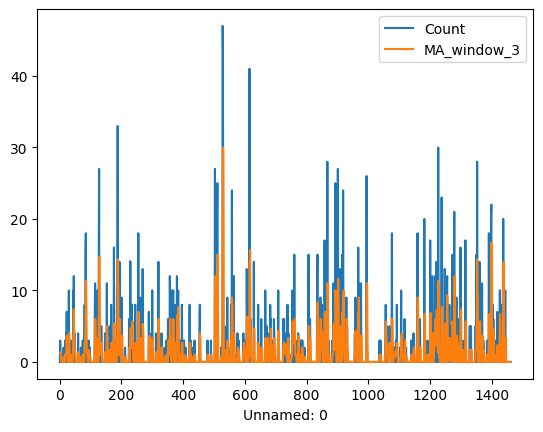

In [ ]:
o_data = data.copy()

o_data["Count"][50:55] = np.nan

o_data.plot()

<Axes: title={'center': 'среднее из предыдущего и последующего'}, xlabel='Unnamed: 0'>

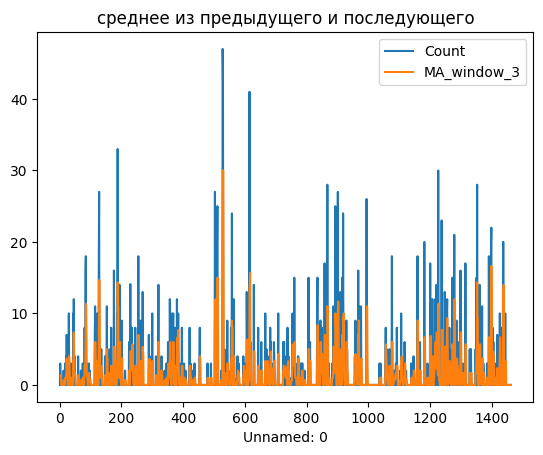

In [ ]:
new_value = (o_data["Count"][55] + o_data["Count"][49])/2

o_data["Count"][50:55] = new_value

o_data.plot(title="среднее из предыдущего и последующего")

<Axes: title={'center': 'Последующее значение'}, xlabel='Unnamed: 0'>

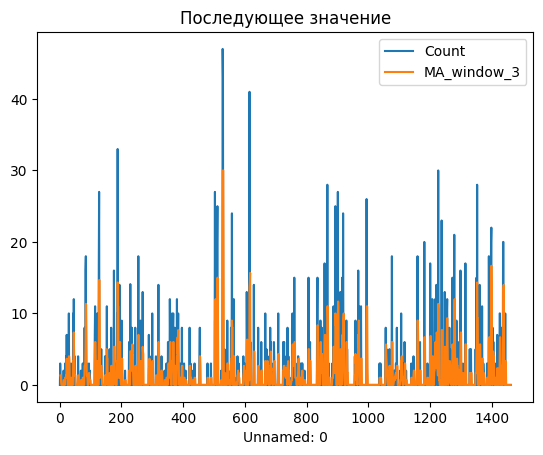

In [ ]:
new_value = o_data["Count"][55]

o_data["Count"][50:55] = new_value

o_data.plot(title='Последующее значение')

<Axes: title={'center': 'Предыдущее значение'}, xlabel='Unnamed: 0'>

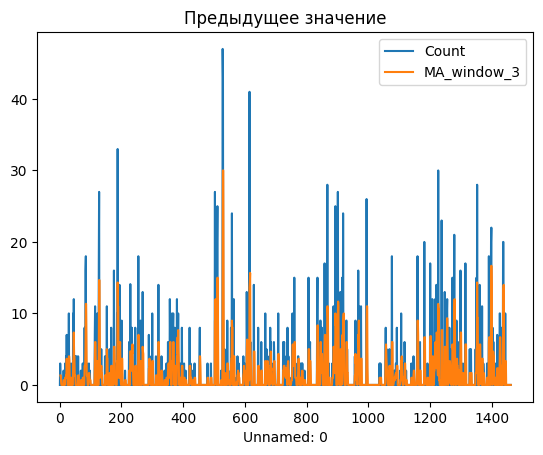

In [ ]:
new_value = o_data["Count"][49]

o_data["Count"][50:55] = new_value

o_data.plot(title='Предыдущее значение')

<Axes: title={'center': 'медиана'}, xlabel='Unnamed: 0'>

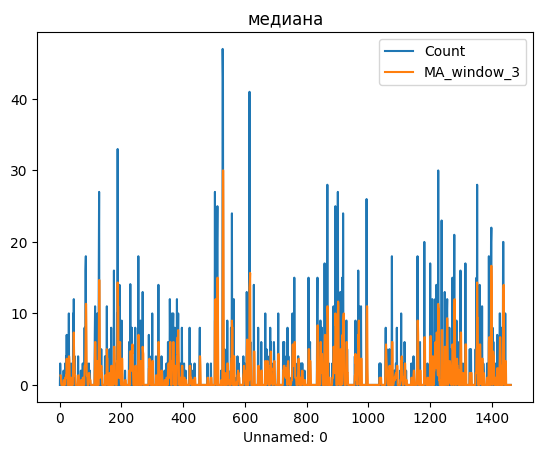

In [ ]:
new_value = o_data["Count"].median()

o_data["Count"][50:55] = new_value

o_data.plot(title='медиана') 

<Axes: title={'center': 'среднее'}, xlabel='Unnamed: 0'>

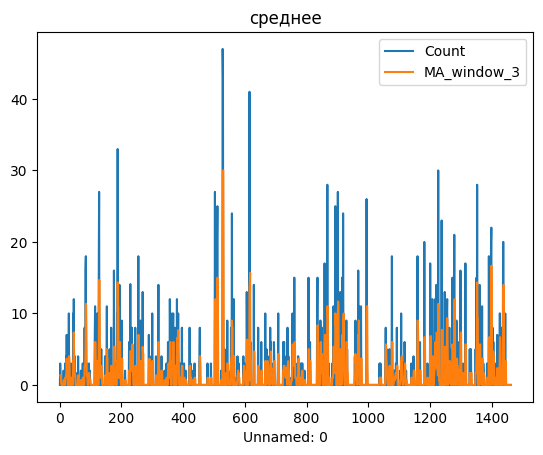

In [ ]:
new_value = o_data["Count"].mean()

o_data["Count"][50:55] = new_value

o_data.plot(title='среднее') 

<Axes: title={'center': 'zero'}, xlabel='Unnamed: 0'>

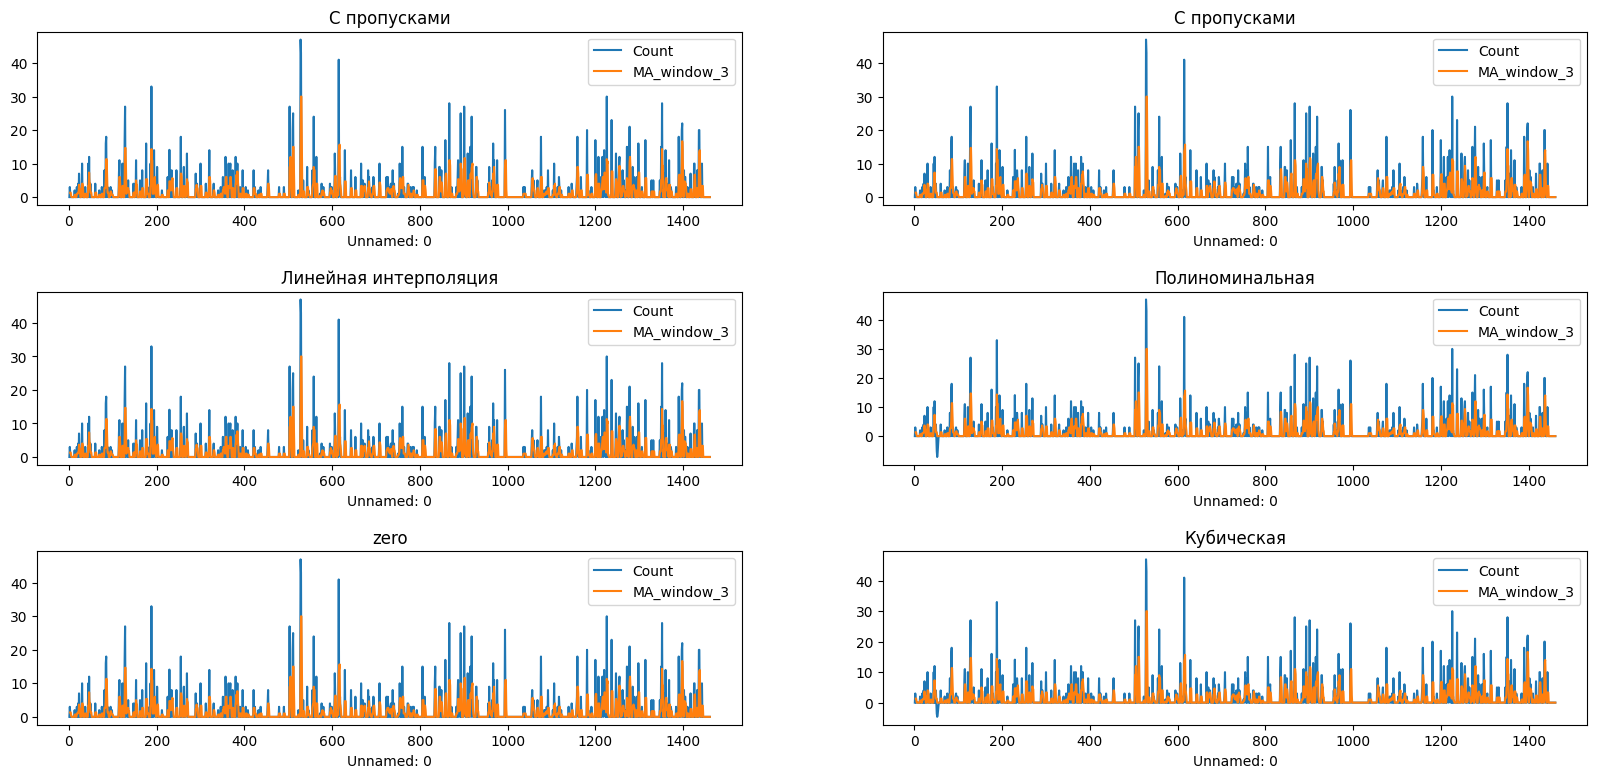

In [ ]:
o_data["Count"][50:55] = np.nan

lin_df = o_data.interpolate(method="linear")

cub_df = o_data.interpolate(method="cubic")

pol_df = o_data.interpolate(method="polynomial", order=5)

zero_df = o_data.interpolate(method="zero")


fig = plt.figure(figsize=(20, 9))
layout = (3, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

original_ax = plt.subplot2grid(layout, (0, 0))
lin_ax = plt.subplot2grid(layout, (1, 0))
cub_ax = plt.subplot2grid(layout, (2, 1))

pol_ax = plt.subplot2grid(layout, (1, 1))
zero_ax = plt.subplot2grid(layout, (2, 0))
 
o_data.plot(title="С пропусками", ax = original_ax)  
o_data.plot(title="С пропусками", ax = plt.subplot2grid(layout, (0, 1)))  
lin_df.plot(title="Линейная интерполяция", ax = lin_ax) 
cub_df.plot(title="Кубическая", ax = cub_ax) 
pol_df.plot(title="Полиноминальная", ax = pol_ax) 
zero_df.plot(title="zero", ax=zero_ax)


In [ ]:
import seaborn as sns

<Axes: >

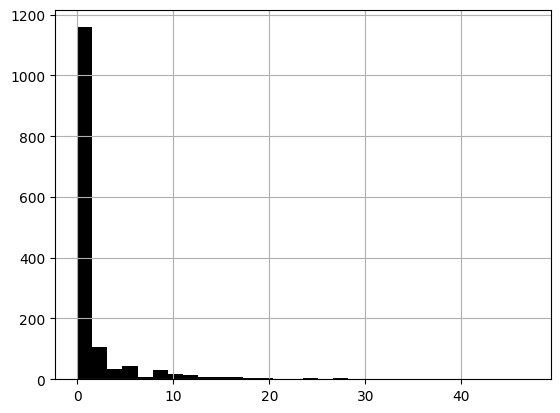

In [ ]:
data["Count"].hist(bins=30, color="black")

<Axes: >

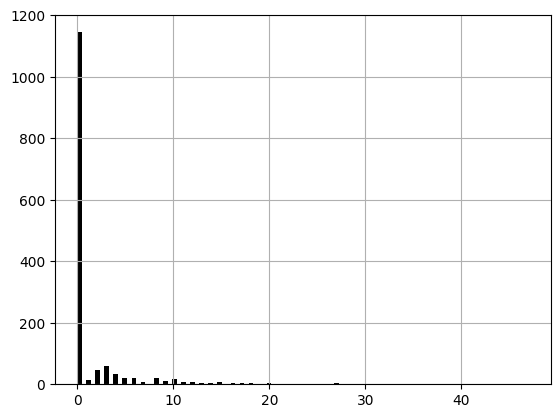

In [ ]:
rawdata["Count"].hist(bins=100, color="black",)

Text(0.5, 1.0, 'Count')

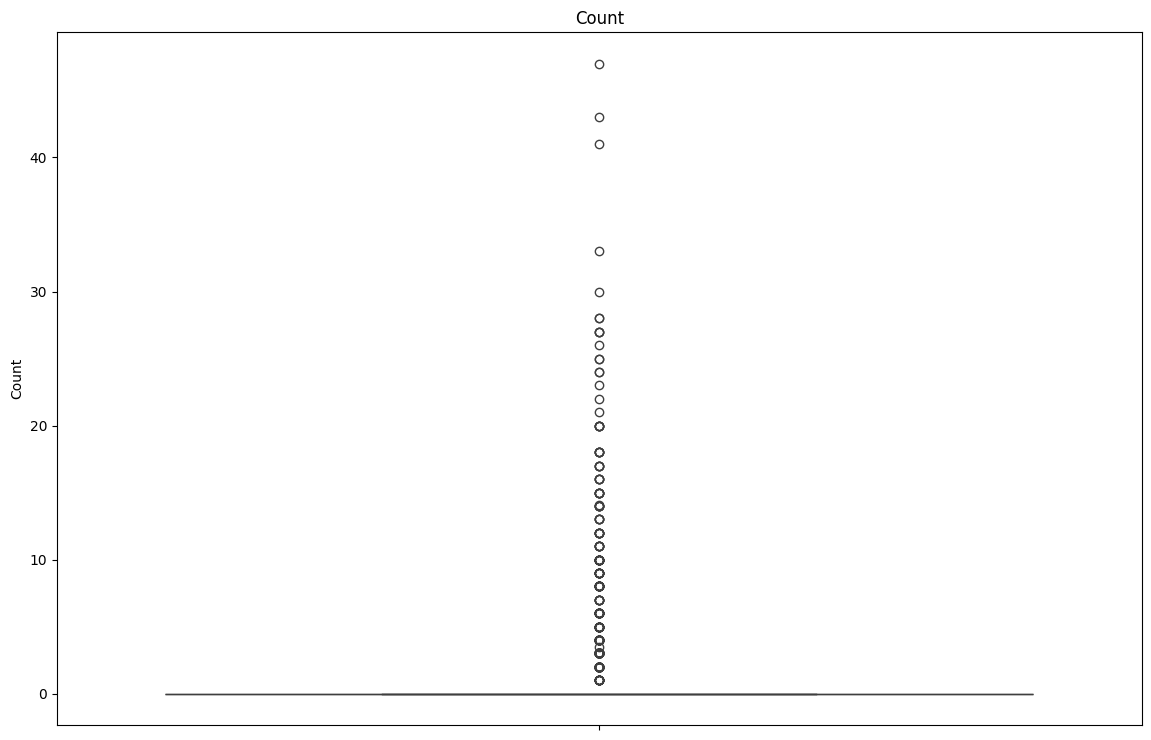

In [ ]:
fig = plt.figure(figsize=(14, 9))

sns.boxplot(data.Count).set_title('Count')

Text(0.5, 1.0, 'Count')

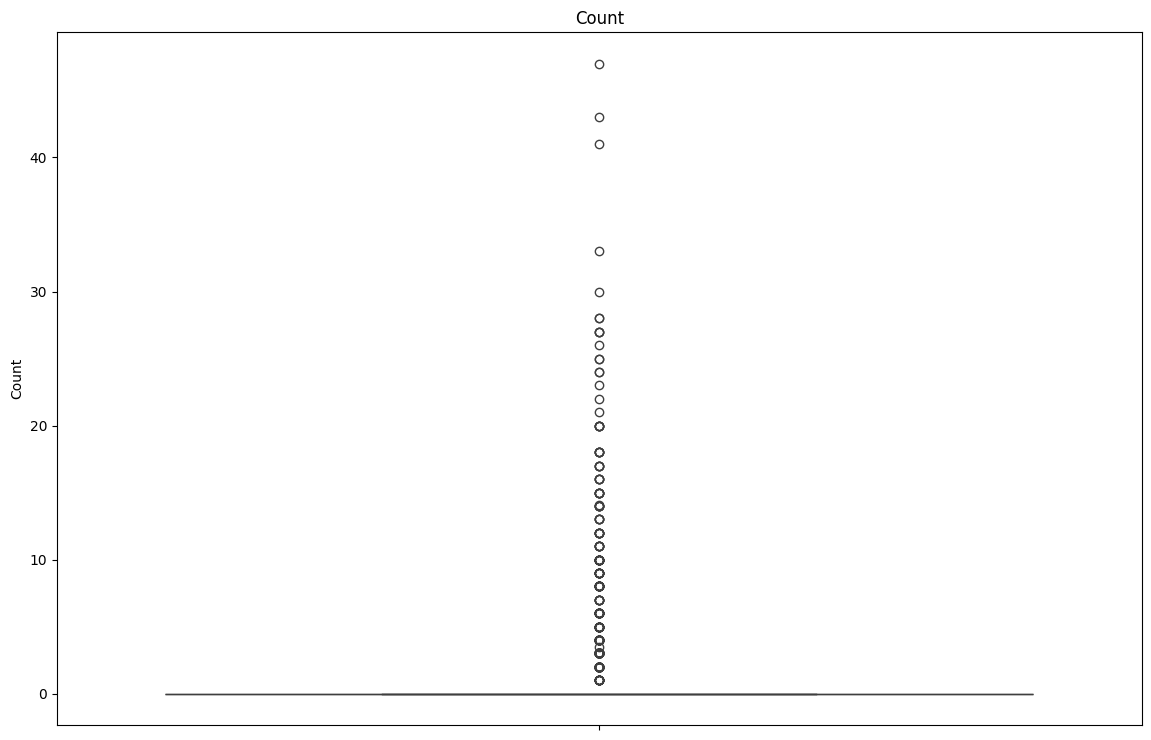

In [ ]:
fig = plt.figure(figsize=(14, 9))
ax = sns.boxplot(rawdata["Count"])
ax.set_title('Count')

In [ ]:
from sklearn import preprocessing, svm

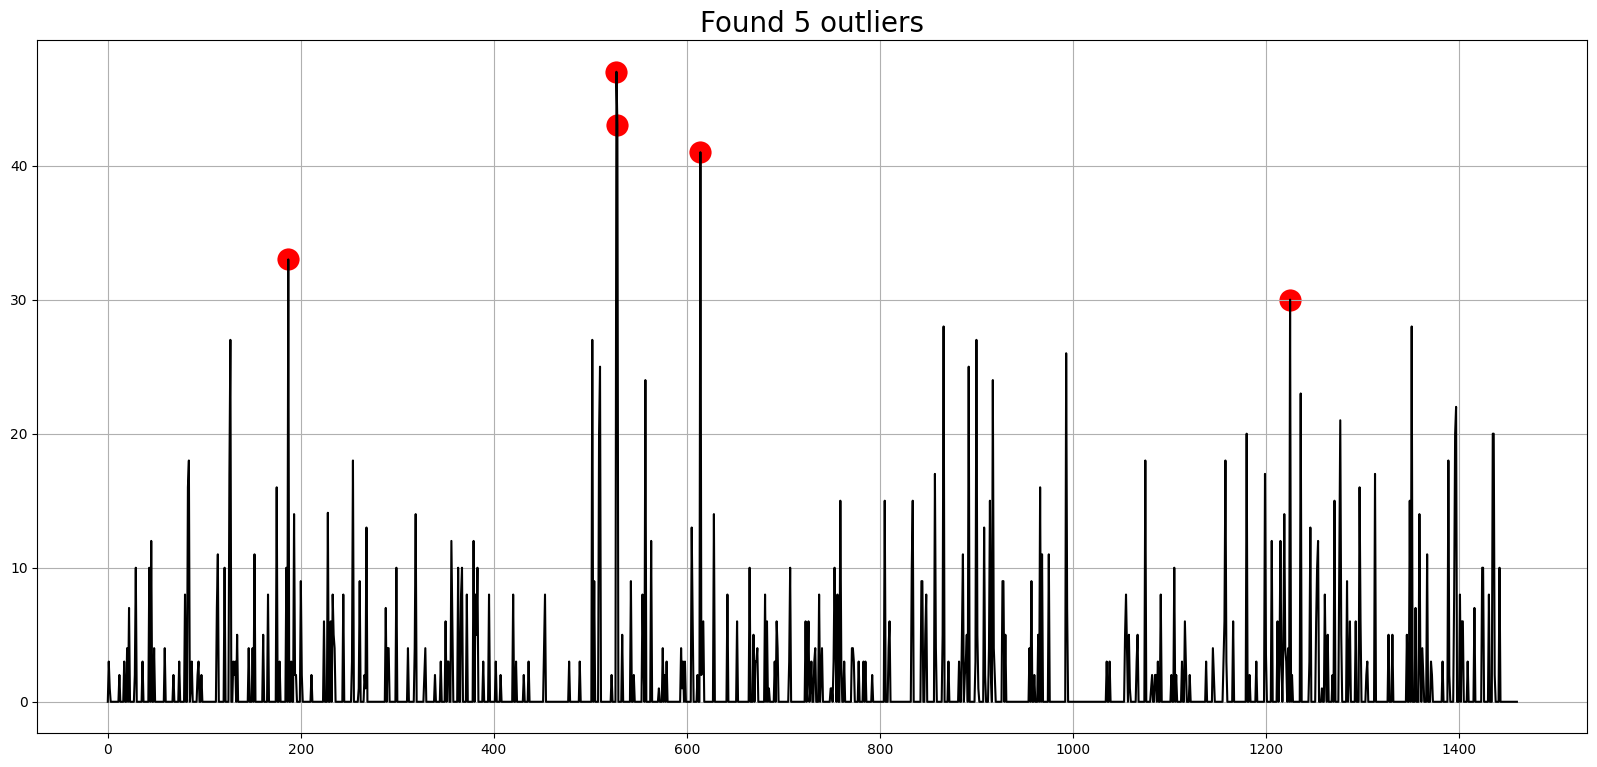

In [ ]:
scaler = preprocessing.StandardScaler()
perc = 0.01

local_df = rawdata["Count"]

ts_scaled = scaler.fit_transform(local_df.values.reshape(-1,1))
model = svm.OneClassSVM(nu=perc, kernel="rbf", gamma=0.01)
model.fit(ts_scaled)
dtf_outliers =local_df.to_frame(name="ts")
dtf_outliers["index"] = range(len(local_df))
dtf_outliers["outlier"] = model.predict(ts_scaled)
dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda x: 1 if x==-1 else 0)
fig, ax = plt.subplots(figsize=(20, 9))
ax.plot(dtf_outliers["index"], dtf_outliers["ts"],
        color="black")
ax.scatter(x=dtf_outliers[dtf_outliers["outlier"]==1]["index"],
           y=dtf_outliers[dtf_outliers["outlier"]==1]['ts'],
           color='red', linewidths=10)
plt.title(f"Found {sum(dtf_outliers['outlier']==1)} outliers", fontdict={'fontsize': 20})
ax.grid(True)
plt.show()

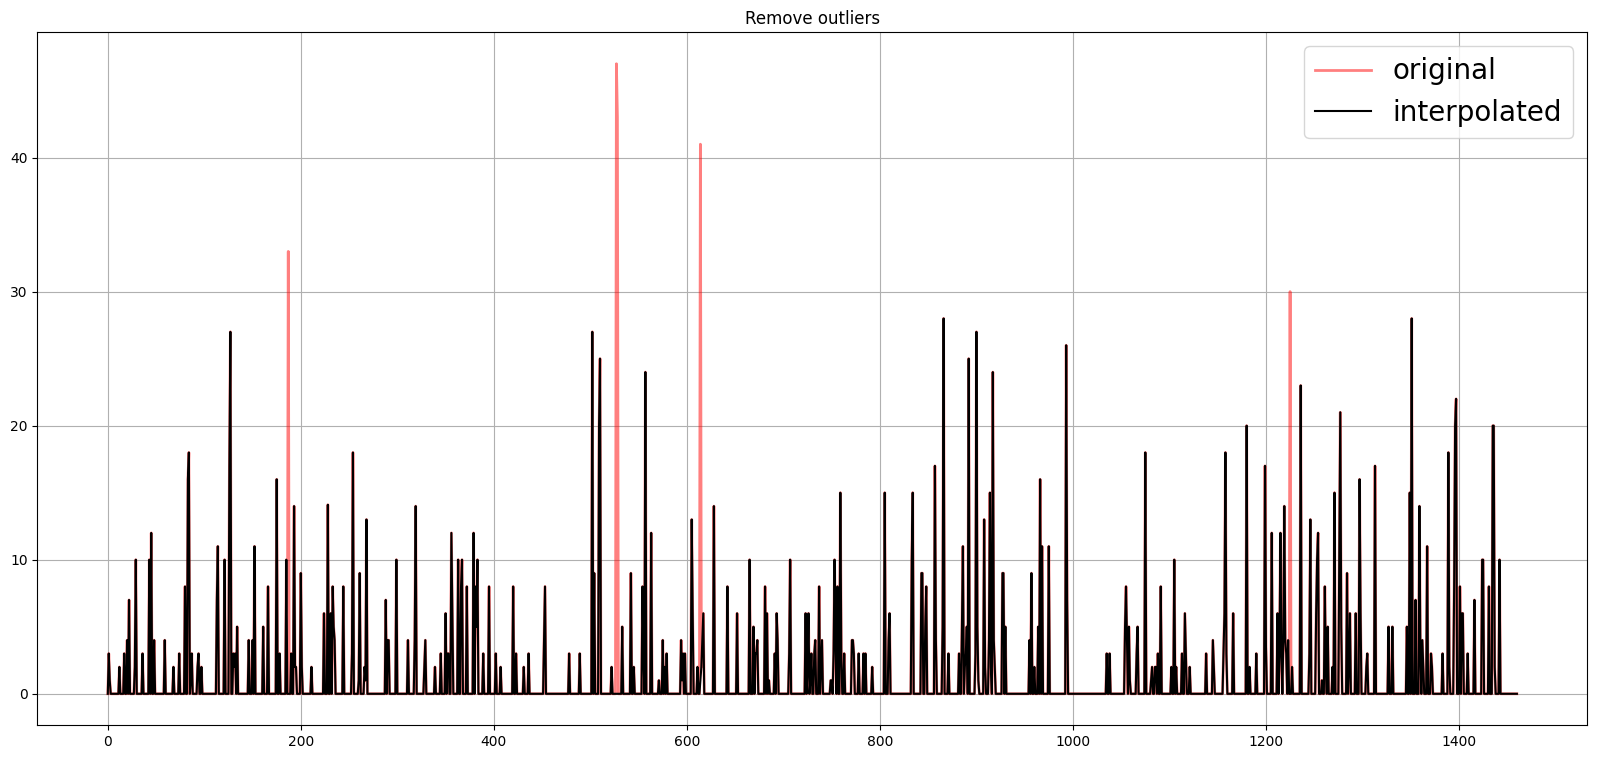

In [ ]:
outliers_idx = dtf_outliers[dtf_outliers["outlier"]==1].index

ts_clean = local_df.copy()
ts_clean.loc[outliers_idx] = np.nan
ts_clean = ts_clean.interpolate(method="linear")
ax = local_df.plot(figsize=(20, 9), color="red", alpha=0.5,
             title="Remove outliers", label="original", legend=True, linewidth=2)
ts_clean.plot(ax=ax, grid=True, color="black",
              label="interpolated", legend=True)
plt.legend(fontsize="20")
plt.show()